# PCA ANALYSIS FOR AUTOMOTIVE DATA

The dataset is a comprehensive compilation of automotive attributes, encompassing 201 entries and 29 columns. It offers a rich array of information, ranging from numerical details like wheel-base, engine size, and price to categorical data such as make, aspiration, and body style. This dataset serves as a valuable resource for exploring the intricate characteristics of automobiles.

Among the notable aspects of this dataset are the presence of missing values in the 'stroke' and 'horsepower-binned' columns. These missing values warrant careful consideration during data preprocessing to ensure the integrity of any future analyses. Additionally, this dataset covers a diverse range of car makes and models, making it a suitable candidate for various analytical tasks and predictive modeling.

As I delve further into this dataset, I look forward to unveiling insightful trends, patterns, and relationships among automotive attributes. This exploration will enable me to gain a deeper understanding of the automotive domain, potentially leading to valuable insights for decision-making processes and predictive modeling in the automotive industry.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sklearn.__version__

'1.3.0'

In [3]:
data = pd.read_csv("C:\\Users\\TOJMARK LTD\\auto_clean.csv")
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [6]:
#Checking for missing value
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [7]:
# Assuming your DataFrame is named 'df'
data.dropna(axis=0, inplace=True)

# 'axis=0' indicates dropping rows with NaN values
# 'inplace=True' I update the DataFrame in place, so  I don't lose its dimension

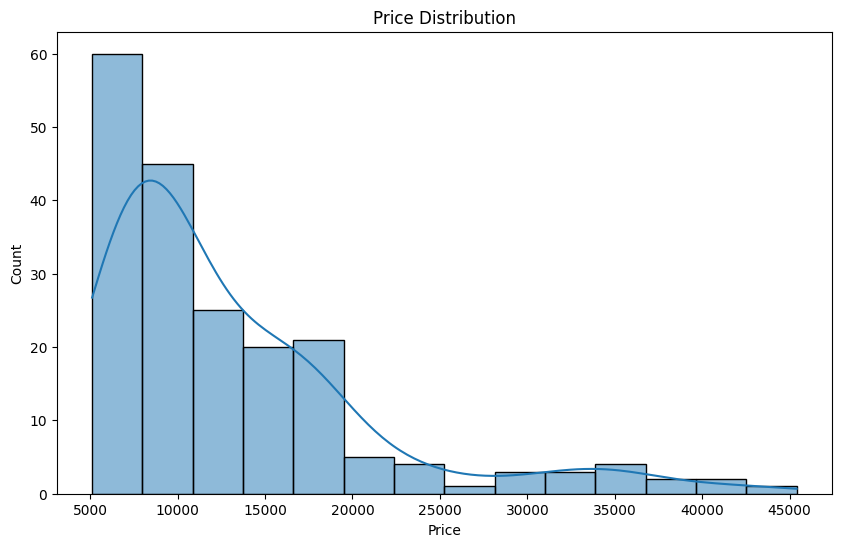

In [8]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

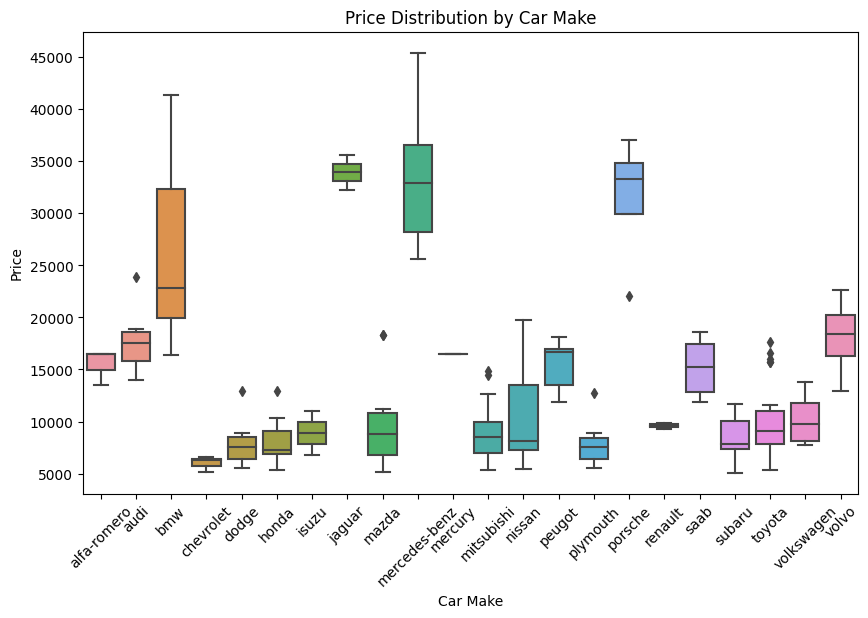

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='price', data=data)
plt.xlabel('Car Make')
plt.ylabel('Price')
plt.title('Price Distribution by Car Make')
plt.xticks(rotation=45)
plt.show()

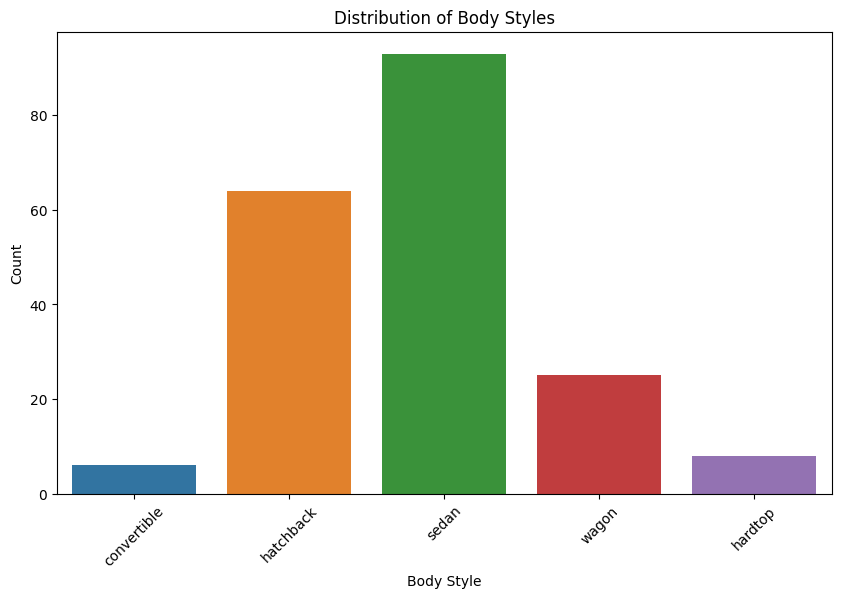

In [10]:
# Categorical Variable Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='body-style', data=data)
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Distribution of Body Styles')
plt.xticks(rotation=45)
plt.show()

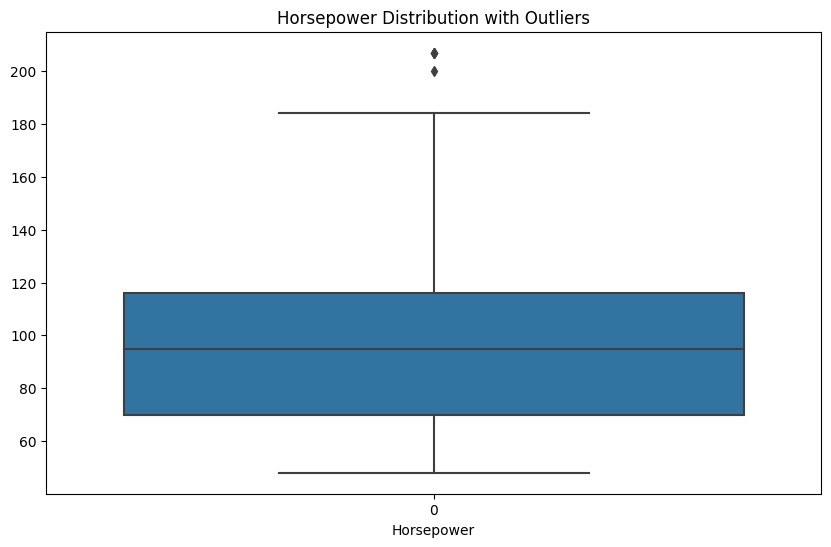

In [11]:
# Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data['horsepower'])
plt.xlabel('Horsepower')
plt.title('Horsepower Distribution with Outliers')
plt.show()

In [13]:
# Grouping and Aggregating
average_price_by_make = data.groupby('make')['price'].mean()
average_price_by_make

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           33900.000000
mazda             9924.538462
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

C:\ProgramData\anaconda3\envs\ojtaiwo\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


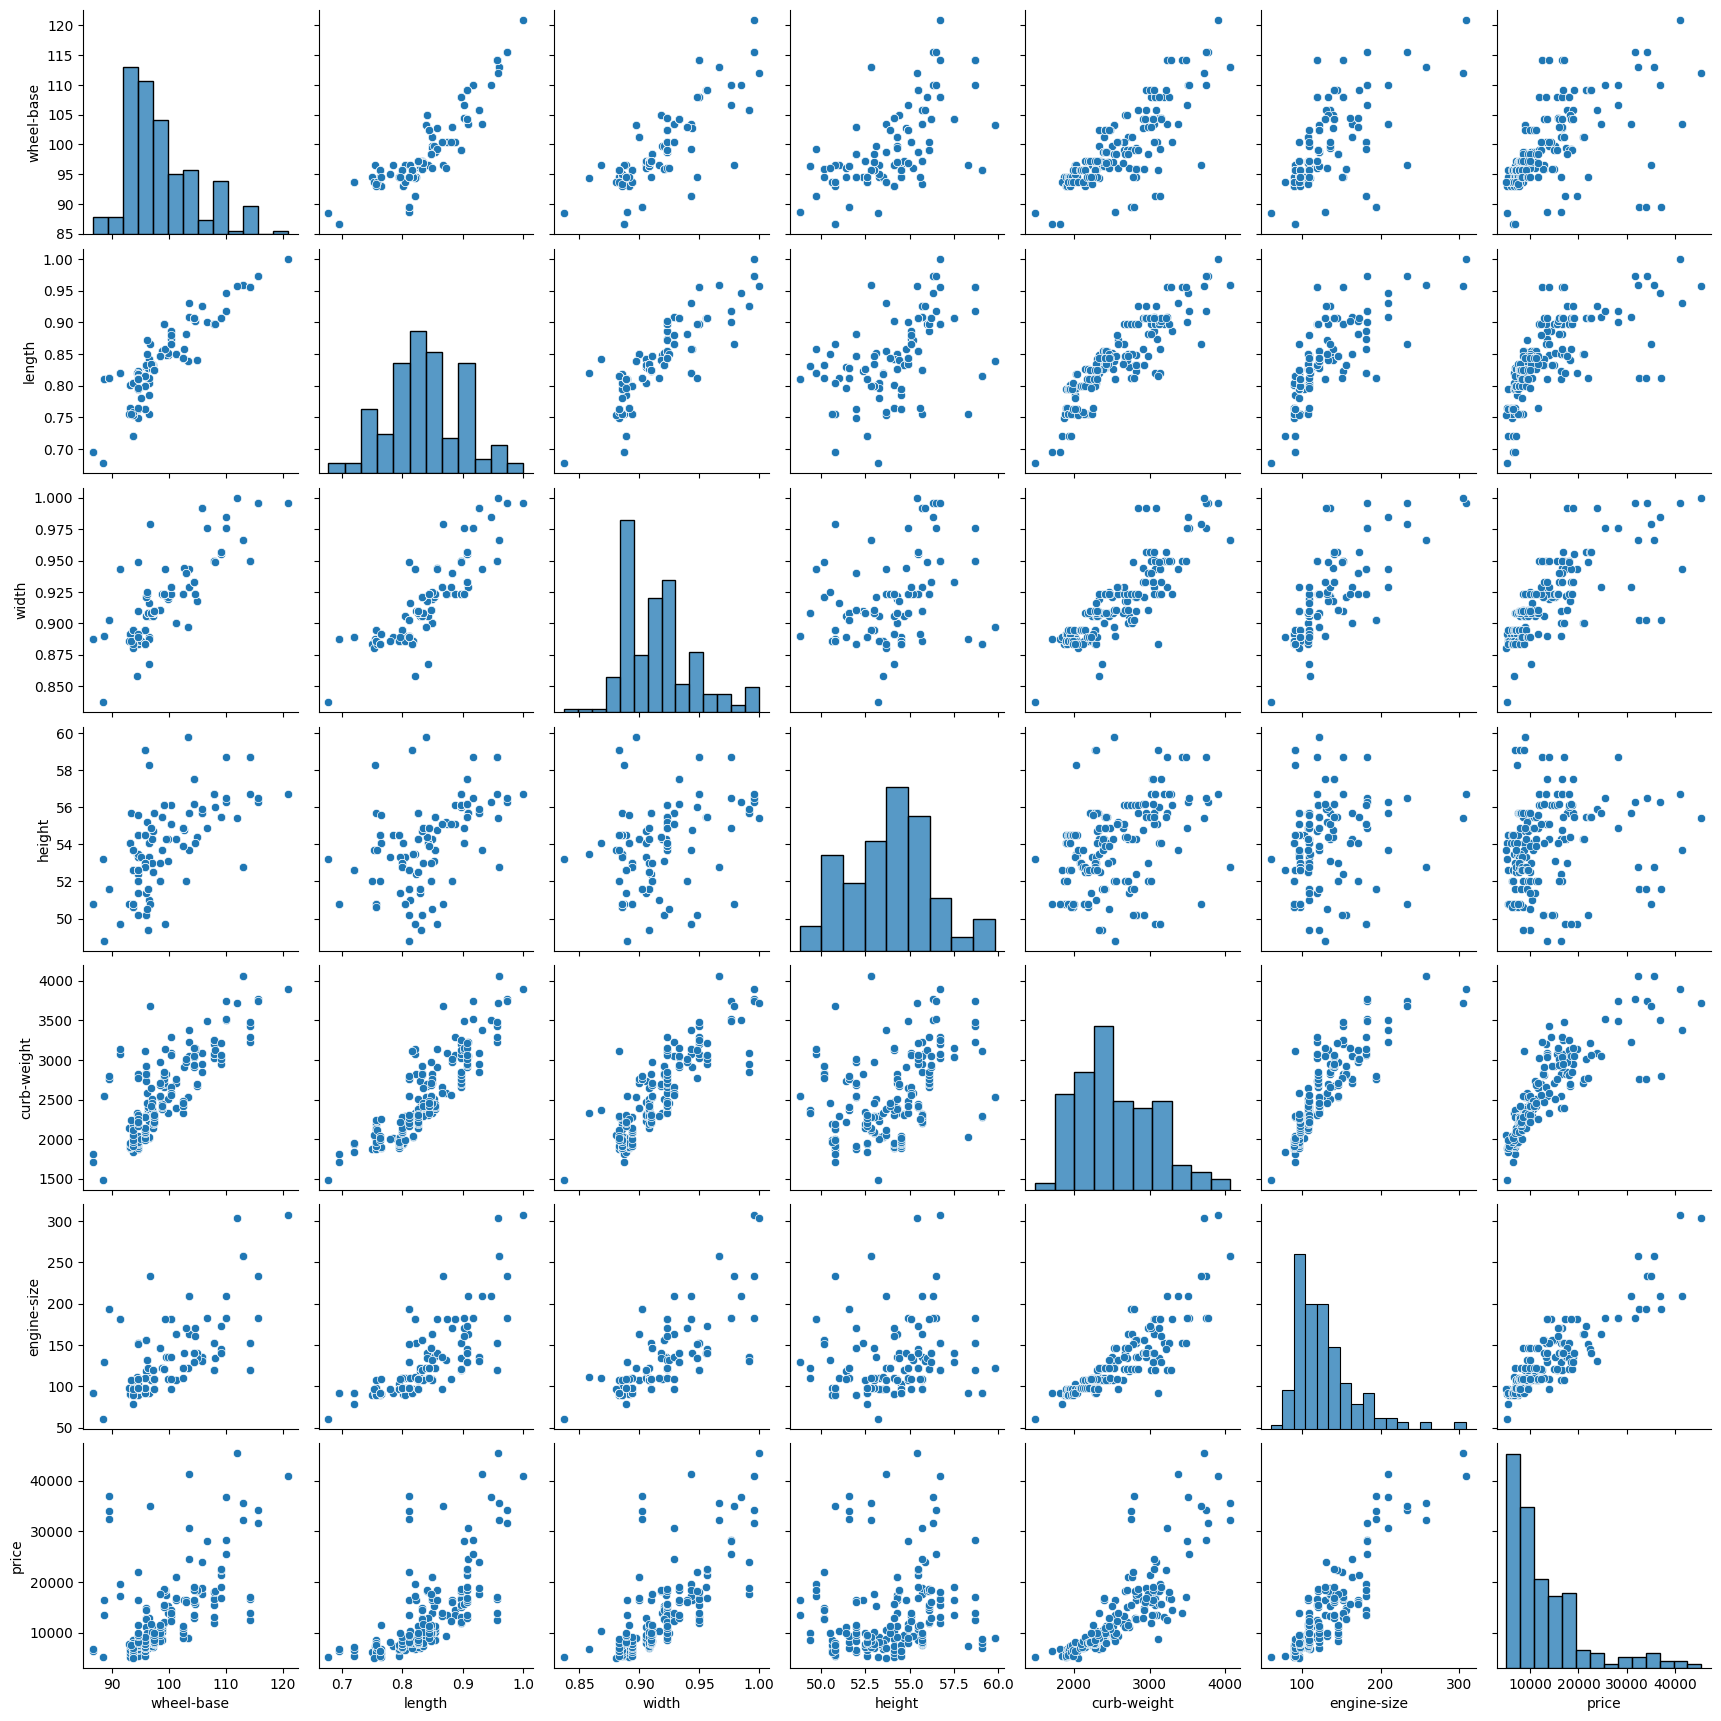

In [14]:
# Pairplot to check for the data relationship
sns.pairplot(data[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'price']])
plt.show()

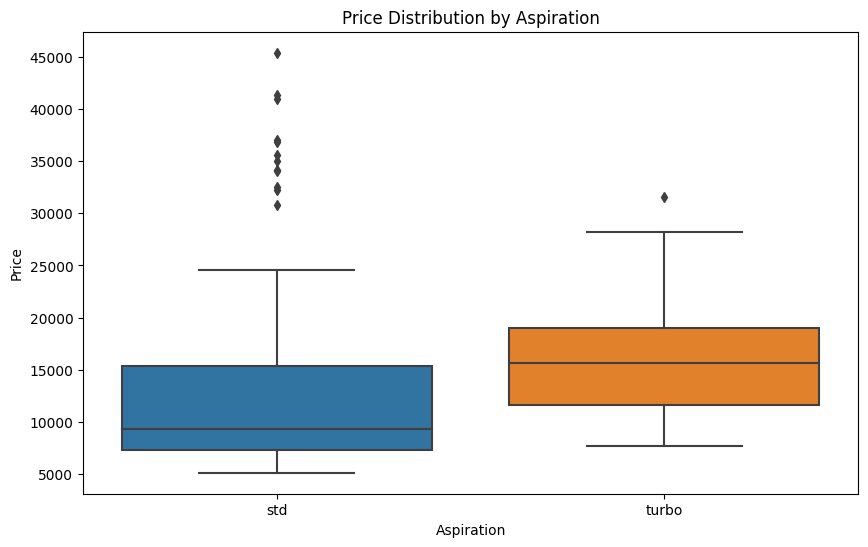

In [15]:
# aspiration vs. Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='aspiration', y='price', data=data)
plt.xlabel('Aspiration')
plt.ylabel('Price')
plt.title('Price Distribution by Aspiration')
plt.show()

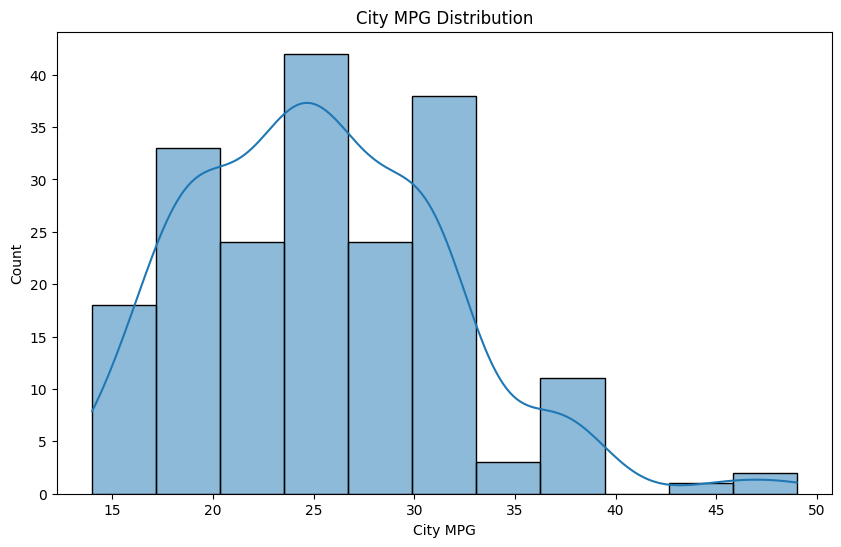

In [16]:
# Distribution of city mpg Variables
plt.figure(figsize=(10, 6))
sns.histplot(data['city-mpg'], kde=True)
plt.xlabel('City MPG')
plt.title('City MPG Distribution')
plt.show()

# DROPPING NON-NUMERIC COLUMNS

In [17]:
# Drop non-numeric columns
data_numeric = data.drop(['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                          'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned', 'diesel', 'gas'], axis=1)


# Principal Conponent Analysis

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA and choose the number of components based on the explained variance ratio
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Determine the number of components explaining 95% of the variance
cumulative_var_ratio = np.cumsum(explained_var_ratio)
n_components = np.argmax(cumulative_var_ratio >= 0.95) + 1

# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Add back non-numeric columns for interpretation
pca_df['make'] = data['make']
pca_df['body-style'] = data['body-style']

# View the results
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.496223  2.740184 -0.179788  2.458260 -0.810089  0.329959  0.065016   
1 -0.381374  2.759178 -0.138679  2.481538 -0.821301  0.501767  0.023069   
2  0.841000  1.582468  0.545670 -1.176202 -0.484142  0.472271  0.713417   
3 -0.149271  1.039629  0.593103 -0.606593  1.383197 -0.112985  0.550081   
4  1.700867  1.980908  0.158212 -0.730792  1.072160 -0.213789  0.901349   

        PC8       PC9         make   body-style  
0  0.181135 -0.927059  alfa-romero  convertible  
1  0.278327 -0.833899  alfa-romero  convertible  
2  2.144929 -0.162686  alfa-romero    hatchback  
3 -0.357096  0.042485         audi        sedan  
4  0.188085  0.055992         audi        sedan  


# #Create Scoring Models
In this step, I can use the PCA results (pca_df) to build predictive models or perform further analysis
For example, I will use the PC1 and PC2 scores as input features for regression or clustering models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (principal components) and target (car prices)
X = pca_df.drop(['make', 'body-style'], axis=1)
y = data['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict car prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9378532396458505


The R-squared value represents the proportion of the variance in the car prices that is explained by the model. In this case, the high R-squared value of 0.938 indicates that approximately 93.8% of the variability in car prices is accounted for by the principal components used in the model. This suggests that the model is performing well in predicting car prices.